In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath("../src"))

from load_data import load_clinical_data
# Load clean data
df = load_clinical_data("../data/raw/Clinical_and_Other_Features.xlsx")




In [2]:
# Quick look
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 98 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient Information                         922 non-null    object 
 1   MRI Technical Information                   922 non-null    object 
 2   Unnamed: 2                                  922 non-null    object 
 3   Unnamed: 3                                  922 non-null    object 
 4   Unnamed: 4                                  922 non-null    object 
 5   Unnamed: 5                                  922 non-null    object 
 6   Unnamed: 6                                  922 non-null    object 
 7   Unnamed: 7                                  922 non-null    object 
 8   Unnamed: 8                                  917 non-null    object 
 9   Unnamed: 9                                  269 non-null    object 
 10  Unnamed: 10   

np.int64(0)

In [3]:

# Style
sns.set(style="whitegrid")

# Load
df = pd.read_csv("../data/processed/merged_metadata.csv")
df.shape
df.columns.tolist()[:10]  # Preview first few column names


['Patient ID',
 'MRI Technical Information',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9']

In [4]:
print(df.columns.tolist())
df.iloc[:, :15].head(5)

df.rename(columns={"Unnamed: 10": "Age"}, inplace=True)


['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation Therapy', 'Unnamed: 57', 'Tumor Response', 'Unnamed: 59', 'Recurrence', 'Unnamed: 61', 'Unnamed: 62', 'Follow Up', 'Unnamed: 64', 'Unna

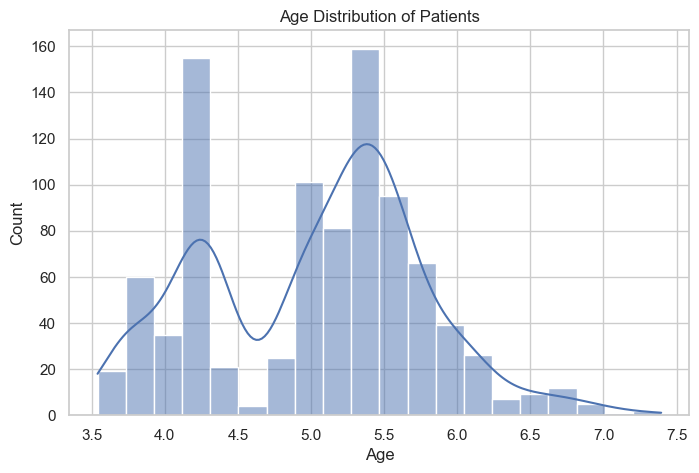

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].astype(float), bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [29]:
# Reload only necessary part
density_df = pd.read_excel("../Data/raw/Breast_Radiologist_Density_Assessments.xlsx")

# Rename the long density column
density_df.rename(columns={
    density_df.columns[4]: "Breast Density"
}, inplace=True)

# Just keep Subject_ID and Breast Density
density_df = density_df[["Subject_ID", "Breast Density"]]


In [30]:
imaging_df = pd.read_excel("../Data/raw/Imaging_Features.xlsx")
# Clean Patient ID columns
df["Patient ID"] = df["Patient ID"].astype(str).str.strip()
imaging_df["Patient ID"] = imaging_df["Patient ID"].astype(str).str.strip()

# Merge with breastDensity_T1 again
df = df.drop(columns=[col for col in df.columns if col == "Breast Density"], errors="ignore")
df = df.merge(imaging_df[["Patient ID", "breastDensity_T1"]], on="Patient ID", how="left")
df.rename(columns={"breastDensity_T1": "Breast Density"}, inplace=True)

# Check result
print(df[["Patient ID", "Breast Density"]].head())

       Patient ID  Breast Density
0  Breast_MRI_001        0.456428
1  Breast_MRI_002        0.491393
2  Breast_MRI_003        0.256082
3  Breast_MRI_004        0.127007
4  Breast_MRI_005        0.202973


In [28]:
# Rename the long BI-RADS column (if it exists) to a simpler name
df.rename(columns={
    'BI‐RADS density categories           (a. Almost entirely fat                          b. Scattered fibroglandular tissue\nc. Heterogeneous fibroglandular tissue\nd. Extreme fibroglandular tissue)': 'Breast Density'
}, inplace=True)

# Now print the result
print(df[["Patient ID", "Breast Density"]].head())

       Patient ID  Breast Density
0  Breast_MRI_001        0.456428
1  Breast_MRI_002        0.491393
2  Breast_MRI_003        0.256082
3  Breast_MRI_004        0.127007
4  Breast_MRI_005        0.202973


In [9]:
# Check how many Patient IDs from df exist in density_df
matched_ids = df["Patient ID"].isin(density_df["Subject_ID"])
print("Number of matches:", matched_ids.sum())

# Show a few IDs from each side to inspect visually
print("\ndf['Patient ID'].head():")
print(df["Patient ID"].head())

print("\ndensity_df['Subject_ID'].head():")
print(density_df["Subject_ID"].head())



Number of matches: 50

df['Patient ID'].head():
0    Breast_MRI_001
1    Breast_MRI_002
2    Breast_MRI_003
3    Breast_MRI_004
4    Breast_MRI_005
Name: Patient ID, dtype: object

density_df['Subject_ID'].head():
0    Breast_MRI_010
1    Breast_MRI_014
2    Breast_MRI_026
3    Breast_MRI_029
4    Breast_MRI_038
Name: Subject_ID, dtype: object


In [31]:
import os

files = os.listdir("../Data/raw/")
print(files)
for file in files:
    if file.endswith((".xlsx", ".csv")):
        try:
            path = os.path.join("../Data/raw/", file)
            df_temp = pd.read_excel(path) if file.endswith(".xlsx") else pd.read_csv(path)
            for col in df_temp.columns:
                if "density" in str(col).lower():
                    print(f"\n✅ Found in: {file}")
                    print("Column:", col)
                    print(df_temp[[col]].head())
        except Exception as e:
            print(f"⚠️ Could not read {file}: {e}")


['Annotation_Boxes.xlsx', 'train_ids.csv', 'test_ids.csv', 'Clinical_and_Other_Features.xlsx', 'duke_README.txt', 'Breast_Radiologist_Density_Assessments.xlsx', 'Imaging_Features.xlsx', 'Breast-Cancer-MRI-filepath_filename-mapping.xlsx', 'segmentation_filepath_mapping.csv']

✅ Found in: Breast_Radiologist_Density_Assessments.xlsx
Column: BI‐RADS density categories           (a. Almost entirely fat                          b. Scattered fibroglandular tissue
c. Heterogeneous fibroglandular tissue
d. Extreme fibroglandular tissue)
   BI‐RADS density categories           (a. Almost entirely fat                          b. Scattered fibroglandular tissue\nc. Heterogeneous fibroglandular tissue\nd. Extreme fibroglandular tissue)
0                                                NaN                                                                                                                                                  
1                                                NaN                

In [ ]:
# Show some ID samples from both dataframes
print("Sample df IDs:", df["Patient ID"].unique()[:5])
print("Sample imaging_df IDs:", imaging_df["Patient ID"].unique()[:5])

# Count matching IDs
matching_ids = set(df["Patient ID"]).intersection(set(imaging_df["Patient ID"]))
print("Number of matching IDs:", len(matching_ids))


Sample df IDs: ['Breast_MRI_001' 'Breast_MRI_002' 'Breast_MRI_003' 'Breast_MRI_004'
 'Breast_MRI_005']
Sample imaging_df IDs: ['Breast_MRI_001' 'Breast_MRI_002' 'Breast_MRI_003' 'Breast_MRI_004'
 'Breast_MRI_005']
Number of matching IDs: 922


In [ ]:
# Merge breastDensity_T1 if not already present
if "Breast Density" not in df.columns:
    df = df.merge(imaging_df[["Patient ID", "breastDensity_T1"]], on="Patient ID", how="left")
    df.rename(columns={"breastDensity_T1": "Breast Density"}, inplace=True)

# Drop duplicate "Breast Density" columns, if any
breast_density_cols = [col for col in df.columns if col == "Breast Density"]
if len(breast_density_cols) > 1:
    df = df.loc[:, ~df.columns.duplicated()]

# Confirm it's fixed
if "Breast Density" in df.columns:
    print(df[["Patient ID", "Breast Density"]].head())
else:
    print("Breast Density column still missing.")


       Patient ID  Breast Density
0  Breast_MRI_001        0.456428
1  Breast_MRI_002        0.491393
2  Breast_MRI_003        0.256082
3  Breast_MRI_004        0.127007
4  Breast_MRI_005        0.202973


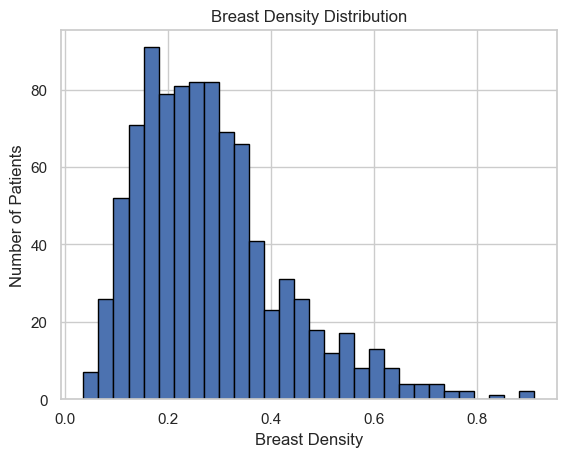

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["Breast Density"], bins=30, edgecolor="black")
plt.title("Breast Density Distribution")
plt.xlabel("Breast Density")
plt.ylabel("Number of Patients")
plt.show()


In [ ]:
print(df["Breast Density"].describe())


count    922.000000
mean       0.283422
std        0.142337
min        0.035871
25%        0.176911
50%        0.260727
75%        0.349657
max        0.911451
Name: Breast Density, dtype: float64


In [ ]:
df["Near Complete Response"].value_counts()

Near Complete Response
0.0    207
1.0     64
2.0     29
3.0     12
Name: count, dtype: int64

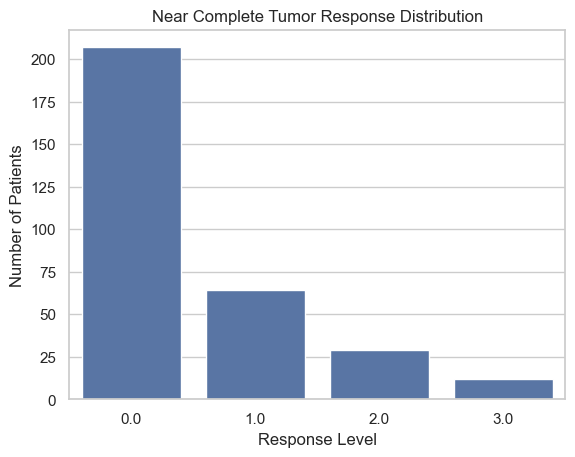

In [ ]:
sns.countplot(x="Near Complete Response", data=df)
plt.title("Near Complete Tumor Response Distribution")
plt.xlabel("Response Level")
plt.ylabel("Number of Patients")
plt.show()

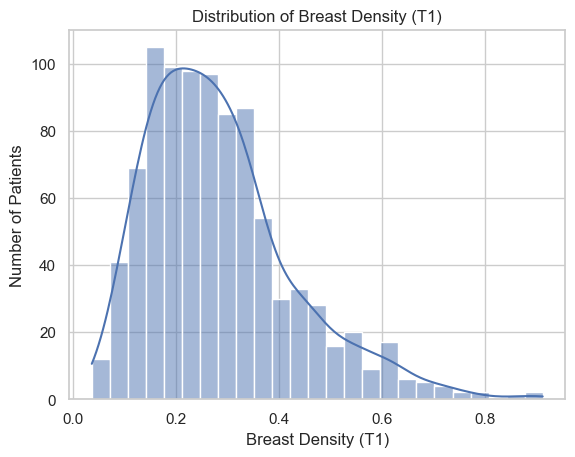

In [ ]:
sns.histplot(df["Breast Density"], kde=True)
plt.title("Distribution of Breast Density (T1)")
plt.xlabel("Breast Density (T1)")
plt.ylabel("Number of Patients")
plt.show()


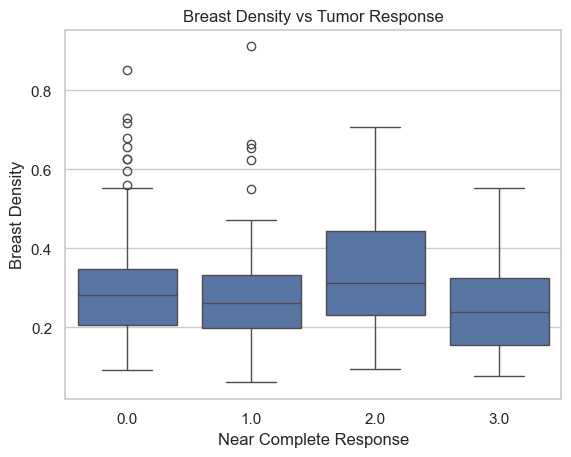

In [ ]:
sns.boxplot(x="Near Complete Response", y="Breast Density", data=df)
plt.title("Breast Density vs Tumor Response")
plt.xlabel("Near Complete Response")
plt.ylabel("Breast Density")
plt.show()


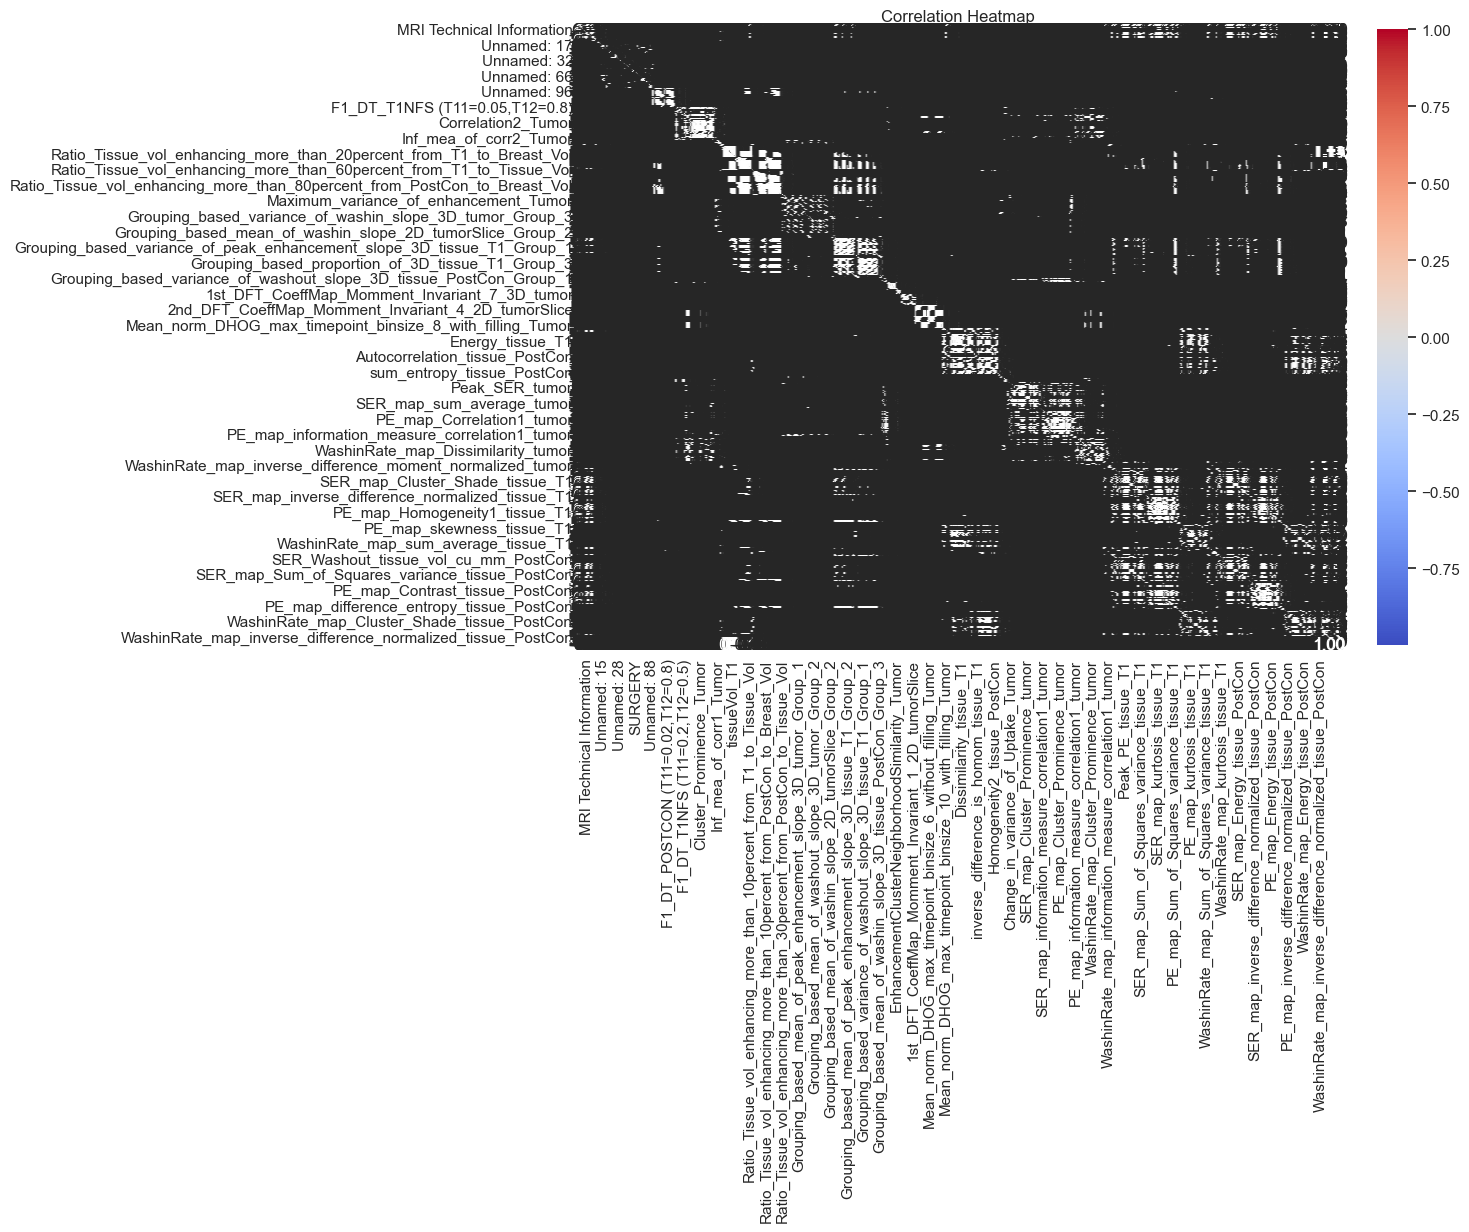

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


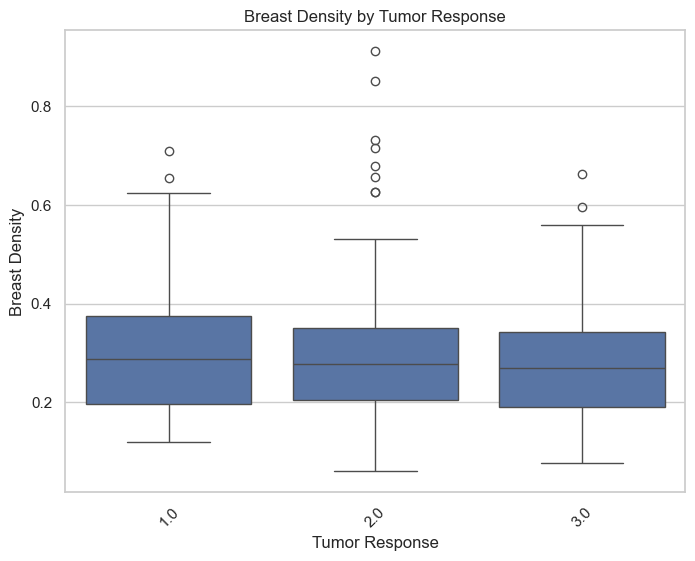

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x="Tumor Response", y="Breast Density", data=df)
plt.title("Breast Density by Tumor Response")
plt.xticks(rotation=45)
plt.show()


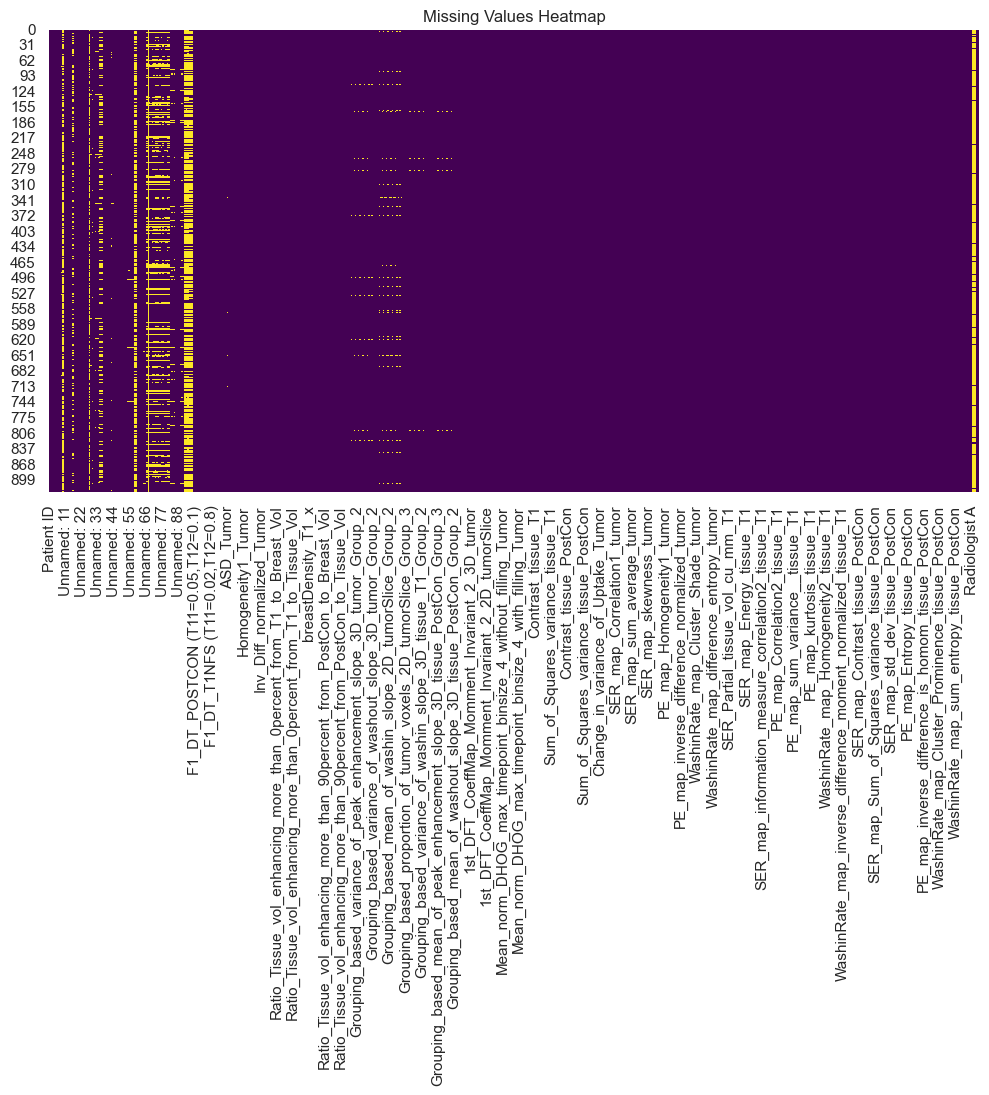

In [35]:
#Missing value heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


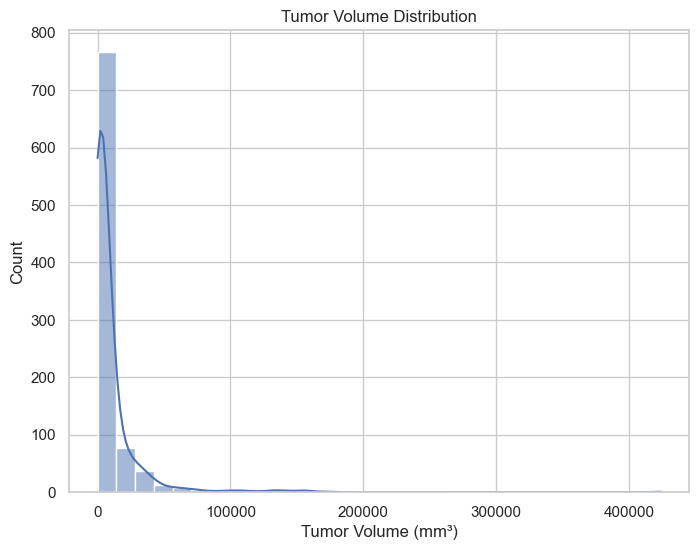

In [40]:
[col for col in df.columns if "volume" in col.lower()]
plt.figure(figsize=(8, 6))
sns.histplot(df["Volume_cu_mm_Tumor"].dropna(), bins=30, kde=True)
plt.title("Tumor Volume Distribution")
plt.xlabel("Tumor Volume (mm³)")
plt.ylabel("Count")
plt.show()


In [42]:
[col for col in df.columns if "volume" in col.lower()]
[col for col in df.columns if "response" in col.lower()]


['Tumor Response',
 'Pathologic Response to Neoadjuvant Therapy',
 'Near Complete Response']

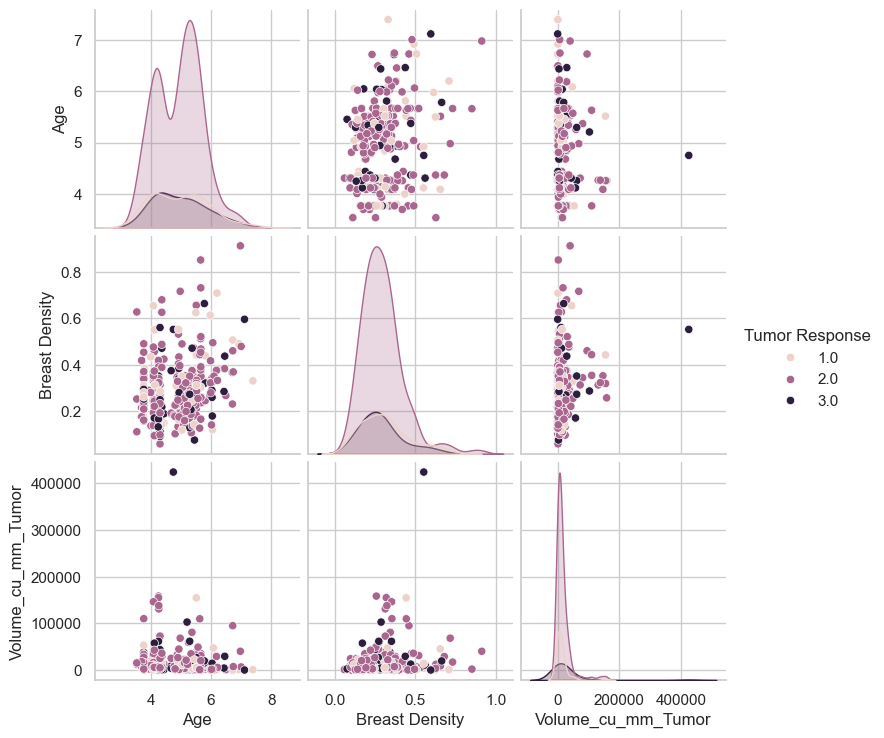

In [44]:
sns.pairplot(df[["Age", "Breast Density", "Volume_cu_mm_Tumor", "Tumor Response"]], hue="Tumor Response")
plt.show()
